# Aviation Industry Analysis

#### Elina Rankova

## 1. Business Problem and Understanding

**Stakeholders:** CEO, Head of Operations, Head of Aviation (brand new department)

Our company is expanding in to airplane aviation to diversify its portfolio. We aim to evaluate which aircrafts and aircraft specifcs pose the lowest risk as we venture into a brand new industry. 

**Some preliminary questions include:**

- *What type of aircraft makes the most sense to purchase first?*
- *Are there aircraft specifics such as number of engines, or engine type that contribute to risk?*
- *Have there been improvements in aviation technology and regulation helping us which data is valid?*

For analysis, we are using data from the <a href = "https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses">Aviation Accident Database & Synopses</a>, up to 2023.

Each record represents an accident event and includes much information about aircraft specifics as well as passenger injury details.

We want to find out which statistics about aviation accident reports provide valuable information about which aircraft poses least risk.

**The goal: evaluate which type of airplane makes the most sense purchase as we enter an industry we have not explored before**

We want to find out which statistics about aviation accident reports provide valuable information about which aircraft poses least risk.

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load in data

# Had to specify encoding 'latin-1' for file to load
# Setting low_memory=False in the read_csv function will force pandas to read the entire file at once, 
# which can help with inferring the correct data types. 

ad = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)
ad.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
ad.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We will have to do some cleaning since there seems to be a good amount of missingness. There are date columns that might also need to be converted to a non-object type.

**Additional observations:**
- 88888 rows and 31 columns
- 5 floats and 26 objects
- Columns may will need capitalization adjusted
- Outliers in numerical columns
- There are some outliers that may need to be addressed

## 2. Data Exploration & Preparation 

The following process reflects preliminary data cleaning to adjust the dataframe to a working condition for the subsequent statistical analysis and visualization exploration.

Handling the missingness will be a large part of data cleaning for this dataset.

In [5]:
# Assess the missingness

ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [6]:
# Assess missingness by percentage

ad.isna().sum()/len(ad)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

#### Exploration of Column Values

To understand how to handle the missingness as well as understand which imputations may be necessary for analysis, we must explore each column.

Some columns will be dropped and must be noted as such.

<br>**Injury Severity:** Adjust capitalization and combine all fatal cases into one.

In [7]:
ad['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: Injury.Severity, Length: 109, dtype: int64

<br>**Aircraft Damage:** # Can adjust capitalization, imputate and na to 'unknown', then redistribute unknowns based probability.

In [8]:
ad['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

<br>**Make:** Lowercase all letters.

In [9]:
ad['Make'].value_counts()

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: Make, Length: 8237, dtype: int64

<br>**Registration Number:** This column isn't needed, we can drop it.

In [10]:
ad['Registration.Number'].value_counts()

NONE      344
UNREG     126
None       65
UNK        13
USAF        9
         ... 
N93478      1
N519UA      1
N8840W      1
N21040      1
N9026P      1
Name: Registration.Number, Length: 79105, dtype: int64

<br>**Number of Engines:** Missing ~7% of data. Distribute na values based on probabily distribution of existing values

In [11]:
ad['Number.of.Engines'].value_counts(normalize=True)

1.0    0.840312
2.0    0.133796
0.0    0.014806
3.0    0.005833
4.0    0.005205
8.0    0.000036
6.0    0.000012
Name: Number.of.Engines, dtype: float64

<br> **Engine Type:** Adjust capitalization. Missing ~8% of data; we can combine unknown & UNK and then redistribute missing values based on probability

In [12]:
ad['Engine.Type'].value_counts(normalize=True)

Reciprocating      0.849875
Turbo Shaft        0.044113
Turbo Prop         0.041449
Turbo Fan          0.030326
Unknown            0.025070
Turbo Jet          0.008593
None               0.000232
Geared Turbofan    0.000147
Electric           0.000122
LR                 0.000024
NONE               0.000024
Hybrid Rocket      0.000012
UNK                0.000012
Name: Engine.Type, dtype: float64

<br>**FAR Description:** Too many na values and not enough significance for analysis, we can drop this column

In [13]:
ad['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


<br> **Schedule:** Not relevant to analysis, we can drop

In [14]:
ad['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

<br> **Purpose of Flight:** Can imputate and na to 'Unknown' & adjust capitalization.

In [15]:
ad['Purpose.of.flight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885         NaN
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight, Length: 88889, dtype: object>

<br> **Air Carrier:** Too much missing data and not enough analytical significance, we can drop this column.

In [16]:
ad['Air.carrier'].value_counts()

Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: Air.carrier, Length: 13590, dtype: int64

<br> **Total Uninjured:** Drop na, may help understand which aircraft is safest

In [17]:
ad['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
558.0        1
412.0        1
338.0        1
401.0        1
455.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

<br> **Weather Condition:** Adjust capitalization and combine; unk & unknown

**Definition:** Visual meteorological conditions (VMC) is an aviation flight category 
in which visual flight rules (VFR) flight is permitted—that is, conditions in which 
pilots have sufficient visibility to fly the aircraft maintaining visual separation 
from terrain and other aircraft. 

In aviation, instrument meteorological conditions (IMC) are weather conditions that 
require pilots to fly primarily by reference to flight instruments. Typically, this 
means flying in cloud or poor weather, where little or nothing can be seen or recognised 
when looking out of the window. 

**Source:** <a href = https://en.wikipedia.org/wiki/Visual_meteorological_conditions>Wikipedia</a>

In [18]:
ad['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

<br> **Broad Phase of Flight:** Combine 'unknown' & 'other'.

In [19]:
ad['Broad.phase.of.flight'].value_counts(normalize=True)

Landing        0.249951
Takeoff        0.202401
Cruise         0.166370
Maneuvering    0.131942
Approach       0.106053
Climb          0.032953
Taxi           0.031722
Descent        0.030572
Go-around      0.021920
Standing       0.015310
Unknown        0.008878
Other          0.001928
Name: Broad.phase.of.flight, dtype: float64

<br> **Report Status:** So much mixed information types, can't know what the numbers mean. Drop this column.

In [20]:
ad['Report.Status'].value_counts(normalize=True)

Probable Cause                                                                                                                                                       0.748461
Foreign                                                                                                                                                              0.024228
<br /><br />                                                                                                                                                         0.002024
Factual                                                                                                                                                              0.001757
The pilot's failure to maintain directional control during the landing roll.                                                                                         0.000679
                                                                                                                                  

<br> **Publication Date:** # Since we have event date and there are, so many values missing we are dropping the column.

In [21]:
ad['Publication.Date'].value_counts(normalize=True)

25-09-2020    0.226564
26-09-2020    0.023550
03-11-2020    0.015376
31-03-1993    0.006017
25-11-2003    0.005272
                ...   
29-11-2004    0.000013
29-08-2001    0.000013
18-11-2004    0.000013
17-12-1996    0.000013
29-12-2022    0.000013
Name: Publication.Date, Length: 2924, dtype: float64

### Basic Data Cleaning

The next step in cleaning is dropping or accounting missingness where appropriate, adjusting data types, capitalization, and other minor adjustments to the database.

#### Drop missing values

In [22]:
# Dropping rows of columns with few missing data
# Will not impact overall analysis

ad.dropna(inplace=True, 
          subset=['Location', 'Country', 'Make', 'Model','Amateur.Built',
                  'Injury.Severity','Total.Uninjured','Total.Fatal.Injuries',
                  'Total.Serious.Injuries','Total.Minor.Injuries'])
ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  50672
Longitude                 50671
Airport.Code              31646
Airport.Name              29363
Injury.Severity               0
Aircraft.damage            2142
Aircraft.Category         45755
Registration.Number         225
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          3956
Engine.Type                4800
FAR.Description           45964
Schedule                  62811
Purpose.of.flight          3603
Air.carrier               57491
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3059
Broad.phase.of.flight     24753
Report.Status              5442
Publication.Date          13104
dtype: i

#### Create `Event.Year` column

In [23]:
# Create event year column

ad['Event.Year'] = ad['Event.Date'].str[:4]
ad['Event.Year']

0        1948
1        1962
3        1977
6        1981
7        1982
         ... 
88882    2022
88883    2022
88884    2022
88886    2022
88888    2022
Name: Event.Year, Length: 73047, dtype: object

#### Adjust Data Types

In [24]:
# Convert Injury columns to int

ad['Event.Year']= ad['Event.Year'].astype(int)
ad['Total.Fatal.Injuries']= ad['Total.Fatal.Injuries'].astype(int)
ad['Total.Serious.Injuries']= ad['Total.Serious.Injuries'].astype(int)
ad['Total.Minor.Injuries']= ad['Total.Minor.Injuries'].astype(int)
ad['Total.Uninjured']= ad['Total.Uninjured'].astype(int)
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73047 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                73047 non-null  object 
 1   Investigation.Type      73047 non-null  object 
 2   Accident.Number         73047 non-null  object 
 3   Event.Date              73047 non-null  object 
 4   Location                73047 non-null  object 
 5   Country                 73047 non-null  object 
 6   Latitude                22375 non-null  object 
 7   Longitude               22376 non-null  object 
 8   Airport.Code            41401 non-null  object 
 9   Airport.Name            43684 non-null  object 
 10  Injury.Severity         73047 non-null  object 
 11  Aircraft.damage         70905 non-null  object 
 12  Aircraft.Category       27292 non-null  object 
 13  Registration.Number     72822 non-null  object 
 14  Make                    73047 non-null

#### Adjust Capitalization

In [25]:
# Create function to lowercase selected columns

def lowercase(df):
    df = df.apply(lambda x: x.str.lower())
    return df

# Imutate on database to lowercase all relevant columns

ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
    'Location','Injury.Severity','Aircraft.damage']] \
= lowercase(ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
                'Location','Injury.Severity','Aircraft.damage']])
ad['Engine.Type'].value_counts(normalize=True)

reciprocating      0.857986
turbo shaft        0.041203
turbo prop         0.038786
unknown            0.026785
turbo fan          0.026682
turbo jet          0.008059
none               0.000308
electric           0.000117
lr                 0.000029
hybrid rocket      0.000015
geared turbofan    0.000015
unk                0.000015
Name: Engine.Type, dtype: float64

In [26]:
# Create function to uppercase selected columns

def uppercase(df):
    df = df.apply(lambda x: x.str.upper())
    return df

ad[['Weather.Condition']] = uppercase(ad[['Weather.Condition']])
ad['Weather.Condition'].value_counts(normalize=True)

VMC    0.915971
IMC    0.070612
UNK    0.013417
Name: Weather.Condition, dtype: float64

#### Addressing Unknown Category

In [27]:
# Combine all versions of 'unknown' into one 'unknown'

ad.loc[ad['Engine.Type'] == 'unk', ['Engine.Type']] = 'unknown'
ad.loc[ad['Injury.Severity'] == 'unavailable', ['Injury.Severity']] = 'unknown'
ad.loc[ad['Weather.Condition'] == 'UNK', ['Weather.Condition']] = 'unknown'
ad.loc[ad['Broad.phase.of.flight'] == 'Other', ['Broad.phase.of.flight']] = 'Unknown'

print(ad['Number.of.Engines'].value_counts())
print(ad['Injury.Severity'].value_counts())
print(ad['Weather.Condition'].value_counts())
print(ad['Broad.phase.of.flight'].value_counts())

1.0    58468
2.0     8925
0.0      932
3.0      417
4.0      345
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
non-fatal     56490
fatal          5248
fatal(1)       4653
fatal(2)       2771
incident       1548
              ...  
fatal(56)         1
fatal(37)         1
fatal(132)        1
fatal(68)         1
fatal(111)        1
Name: Injury.Severity, Length: 70, dtype: int64
VMC        64107
IMC         4942
unknown      939
Name: Weather.Condition, dtype: int64
Landing        11719
Takeoff         9906
Cruise          8194
Maneuvering     6440
Approach        5135
Climb           1625
Taxi            1499
Descent         1482
Go-around       1060
Standing         679
Unknown          555
Name: Broad.phase.of.flight, dtype: int64


In [28]:
# Adjust na value to it's own category

ad['Purpose.of.flight'].fillna('unknown', inplace=True)
ad['Aircraft.damage'].fillna('unknown', inplace=True)
ad['Aircraft.Category'].fillna('unknown', inplace=True)
ad['Injury.Severity'].fillna('unknown', inplace=True)
ad['Engine.Type'].fillna('unknown', inplace=True)
ad['Weather.Condition'].fillna('unknown', inplace=True)
ad['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

print(ad['Purpose.of.flight'].isna().sum())
print(ad['Aircraft.damage'].isna().sum())
print(ad['Aircraft.Category'].isna().sum())
print(ad['Injury.Severity'].isna().sum())
print(ad['Engine.Type'].isna().sum())
print(ad['Weather.Condition'].isna().sum())
print(ad['Broad.phase.of.flight'].isna().sum())

0
0
0
0
0
0
0


<br> It looks like `Aircraft.Category` has a lot of missign values and is not eligible to redistribute the unknowns. While may be useful for analysis, we might not have enough data to get meaningful results.

**note:** we may want to offer stakeholders to find complete data for phase 2 of the department expansion

In [29]:
# Confirm new 'unknown' count

ad['Aircraft.Category'].value_counts(normalize=True)

unknown              0.626528
airplane             0.318932
helicopter           0.040097
glider               0.005750
balloon              0.002628
weight-shift         0.002204
gyrocraft            0.002095
powered parachute    0.001246
ultralight           0.000329
wsft                 0.000123
powered-lift         0.000027
rocket               0.000014
blimp                0.000014
ultr                 0.000014
Name: Aircraft.Category, dtype: float64

In [30]:
# Confirm new 'unknown' count

ad['Purpose.of.flight'].value_counts(normalize=True)

personal                     0.565841
unknown                      0.134763
instructional                0.119868
aerial application           0.056279
business                     0.048079
positioning                  0.016578
other work use               0.013279
ferry                        0.009884
aerial observation           0.009076
public aircraft              0.007242
executive/corporate          0.006379
flight test                  0.003464
skydiving                    0.001506
external load                0.001424
air race show                0.001355
public aircraft - federal    0.001081
banner tow                   0.001040
public aircraft - local      0.000890
public aircraft - state      0.000684
glider tow                   0.000589
firefighting                 0.000452
air drop                     0.000096
asho                         0.000082
pubs                         0.000055
publ                         0.000014
Name: Purpose.of.flight, dtype: float64

#### Combining relevant categories in `Make` and `Injury.Severity`

In [31]:
# Combine all Boeing values into one

for value in ad:
    if ad['Make'].str.contains('boeing').any():
        ad.loc[ad['Make'].str.contains('boeing'), 'Make'] = 'boeing'

ad['Make'].value_counts(normalize=True)

cessna                 0.313209
piper                  0.172807
beech                  0.061057
bell                   0.029529
boeing                 0.024614
                         ...   
pacheco                0.000014
sirocco flying club    0.000014
trickle                0.000014
richardson             0.000014
royse ralph l          0.000014
Name: Make, Length: 6316, dtype: float64

<br> We can now see there is an 'unavailable' and 'unknown' category in `Injury.Severity` into which we can add na values. We can then distribute the 'unknown' values based on proportional distribution of the other categories.


In [32]:
# Combine all variations of 'fatal' values into one 'fatal' category

# Custom function to update 'Injury.Severity' based on conditions
def update_injury_severity(severity):
    if pd.notna(severity) and 'fatal' in str(severity).lower() and 'non-fatal' not in str(severity).lower():
        return 'fatal'
    return severity

# Apply the custom function to update 'Injury.Severity'
ad['Injury.Severity'] = ad['Injury.Severity'].apply(update_injury_severity)

ad['Injury.Severity'].value_counts(normalize=True)

non-fatal    0.773338
fatal        0.200008
incident     0.021192
minor        0.002984
serious      0.002368
unknown      0.000110
Name: Injury.Severity, dtype: float64

### REMINDER TO SAVE CLEANED CSV

In [72]:
# Save as cleaned csv
ad.to_csv('Data/AviationData.csv')

### Higher Level Imputation (drop cols, impute on na with stat functions)

Now it's time to make some greater adjustments to the dataset which may involve creating copies of the original dataset in order to be able to easily go back if any mistakes or adjustments need to be addressed.

In [34]:
# Create copy of original data for column dropping

ad_1 = ad.copy()

# Drop rows past 1992 in Event.Year

mask = ad_1['Event.Year'] > 1991
ad_1 = ad_1[mask]

# Validate code worked 

ad_1['Event.Year'].min()

1992

In 1982 and 1991, there were major changes in technological inovations in aviation regulations. So we want data starting 1992 and on for `Event.Year`.

**Source:** <a hrfe = "https://www.faa.gov/about/history/brief_history">Brief History of Aviation Regulations</a>

#### Drop Unneeded Columns

Based on earlier analysis the following columns are either missing too much data to produce meaningful results or do not add any conceptual significance for analysis:
- Latitude
- Longitude
- Airport.Code
- Airport.Name
- Schedule
- FAR.Description
- Registration.Number
- Report.Status
- Publication.Date

**Note:** Any missing too much data, but conceptually may be helpful can be included as recommendation of additional data retrieval for Phase 2 of department expansion.

In [35]:
# Drop unnecessary columns
ad_1 = ad.drop(['Airport.Code', 'Airport.Name', \
                'Schedule','Registration.Number','Latitude','Longitude', \
                'FAR.Description','Air.carrier', \
                'Report.Status','Publication.Date'], axis=1)

#### Statistical Dispersion of NA or Unknown Values

##### Missing ~8 of data from `Number.of.Engines`

ad['Number.of.Engines'].value_counts(normalize=True)

Original distribution:

- 1.0 = 0.843301
- 2.0 = 0.131095
- 0.0 = 0.014839
- 3.0 = 0.005778
- 4.0 = 0.004938
- 8.0 = 0.000036
- 6.0 = 0.000012

After distribution of na:
- 1.0 = 0.843790
- 2.0 = 0.130692
- 0.0 = 0.014778
- 3.0 = 0.005662
- 4.0 = 0.005033
- 8.0 = 0.000034
- 6.0 = 0.000011

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [37]:
# Create copy of data base since this is a major imputation
ad_2 = ad_1.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.843301, 0.131095, 0.014839, 0.005778, 0.004938, 0.000036, 0.000012]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if pd.isna(value) == True:
        return np.random.choice([1.0,2.0,0.0,3.0,4.0,8.0,6.0], p=prob)
    else:
        return value
        
ad_2['Number.of.Engines'] = ad_2['Number.of.Engines'].map(lambda x: impute_pclass(x))
print(ad_2['Number.of.Engines'].value_counts(normalize=True))
print(ad_2['Number.of.Engines'].isna().sum())

1.0    0.846072
2.0    0.129287
0.0    0.013539
3.0    0.005996
4.0    0.005052
8.0    0.000041
6.0    0.000014
Name: Number.of.Engines, dtype: float64
0


##### Missing .09% of data from `Injury.Severity`

ad['Injury.Severity'].value_counts(normalize=True)

Original distribution:

- fatal = 0.970089
- incident = 0.024512
- minor = 0.002494
- serious = 0.001979
- unavailable = 0.000926

After distribution of 'unknown':
- fatal = 0.970970
- incident = 0.024546
- minor = 0.002494
- serious = 0.001990

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [38]:
# Create copy of data base since this is a major imputation
ad_3= ad_2.copy()

# relative probabilities (likelihood of dif classes)
rel_prob = [0.970089, 0.024512, 0.002494, 0.001979]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['fatal','incident','minor','serious'], p=prob)
    else:
        return value
        
ad_3['Injury.Severity'] = ad_3['Injury.Severity'].map(lambda x: impute_pclass(x))
ad_3['Injury.Severity'].value_counts(normalize=True)

non-fatal    0.773338
fatal        0.200118
incident     0.021192
minor        0.002984
serious      0.002368
Name: Injury.Severity, dtype: float64

##### Missing ~3% of data from `Aircraft.damage`

ad['Aircraft.damage'].value_counts(normalize=True)

Original distribution:

- Substantial = 0.729328
- Destroyed = 0.210427
- Unknown = 0.031237
- Minor = 0.029007

After distribution of 'unknown':

- Substantial = 0.753074
- Destroyed = 0.217027
- Minor = 0.029899

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [39]:
# Create copy of data base since this is a major imputation
ad_4= ad_3.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.729328, 0.210427, 0.029007]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['substantial','destroyed','minor'], p=prob)
    else:
        return value
        
ad_4['Aircraft.damage'] = ad_4['Aircraft.damage'].map(lambda x: impute_pclass(x))
ad_4['Aircraft.damage'].value_counts(normalize=True)

substantial    0.750736
destroyed      0.219817
minor          0.029447
Name: Aircraft.damage, dtype: float64

##### Missing ~1.3% of data from `Weather.Condition`

ad['Weather.Condition'].value_counts(normalize=True)

Original distribution:

- VMC = 0.916614
- IMC = 0.070747
- UNKNOWN = 0.012639

After distribution of 'UNKNOWN':

- VMC = 0.928695
- IMC = 0.071305

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [40]:
# Create copy of data base since this is a major imputation
ad_5= ad_4.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.916614, 0.070747]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['VMC','IMC'], p=prob)
    else:
        return value
        
ad_5['Weather.Condition'] = ad_5['Weather.Condition'].map(lambda x: impute_pclass(x))
ad_5['Weather.Condition'].value_counts(normalize=True)

VMC    0.928252
IMC    0.071748
Name: Weather.Condition, dtype: float64

In [41]:
ad_5.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Year                0
dtype: int64

## 3. Statistical Exploration & Evaluation

Finally it's time to visualize our cleaned data to see where we can find statistical significance in relation to risk aversion when looking to invest in aircrafts.

Below, we see that if we want to find any significance in `Total.Uninjured` we need to get rid of the outliers.

In [43]:
ad_5.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,73047.00000,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000
mean,1.14325,0.510685,0.246444,0.303640,4.840651,1998.146837
std,0.44058,4.235008,1.478230,1.549842,26.160360,12.661842
min,0.00000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,1.00000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,1.00000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,8.00000,295.000000,161.000000,171.000000,576.000000,2022.000000


#### Visualize Outliers in `Total.Uninjured`

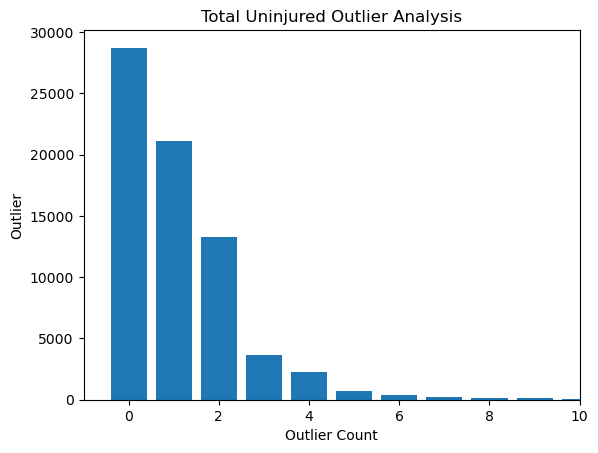

In [44]:
# Identify all outliers of Total.Uninjured
mask = ad_5['Total.Uninjured'].value_counts()

# Assign x, y
x = mask.index
y = mask.values

fig, ax = plt.subplots()

ax.bar(x,y)
plt.xlim(xmin=-1, xmax=10)
ax.set_title('Total Uninjured Outlier Analysis')
ax.set_xlabel('Outlier Count')
ax.set_ylabel('Outlier');

Looks like it makes sense to get rid of outliers with values >7 in the `Total.Uninjured`

In [53]:
# Eliminate outliers (>5) in Total.Uninjured

ad_6 = ad_5.copy()

mask = ad_6['Total.Uninjured'] < 8
ad_6 = ad_6[mask]

# New describe check
ad_6.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,70373.000000,70373.000000,70373.000000,70373.000000,70373.000000,70373.000000
mean,1.108849,0.521123,0.227559,0.260327,1.071192,1998.055632
std,0.383508,4.257489,1.176828,0.769864,1.232974,12.653617
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,8.000000,295.000000,161.000000,62.000000,7.000000,2022.000000


#### Get Top 25 Used `Make`

To be able to analyze which `Make` makes sense to start with, we want to find the top 25 being used.

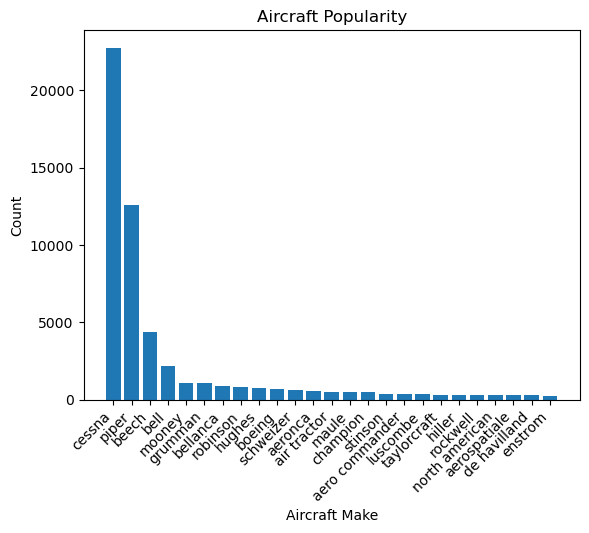

In [46]:
# Get the top 25 'Make' and see which aircrafts are most popular
top25_make_names = ad_6['Make'].value_counts().nlargest(25).index

# Filter the DataFrame to include only the top 25 'Make' values
top25_make_data = ad_6[ad_6['Make'].isin(top25_make_names)]

# Count occurrences of each 'Make'
make_counts = top25_make_data['Make'].value_counts()

#Plot
fig, ax = plt.subplots()

plt.bar(make_counts.index, make_counts.values)

plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Aircraft Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### Top `Make` Compared with `Total.Uninjured` and `Aircraft.damage`

We can tell that Cessna is the most popular make by far. We would also want to know if it causes the least injuries and aircraft damage. 

In addition, we can see that our decision regarding make comes down to the top 4 since beyond that, the count is pretty evenly disperced among the rest of the make types.


For `Total.Uninjured` vs `Make` analysis, it's hard to get any truly significant results since there are only max 7 uninjured passengers after removing outliers. Though, we can tell that Cessna has a leg up on the other top 4 makes. Regardless, we would want more data to confirm that make has the least risk associated with it.

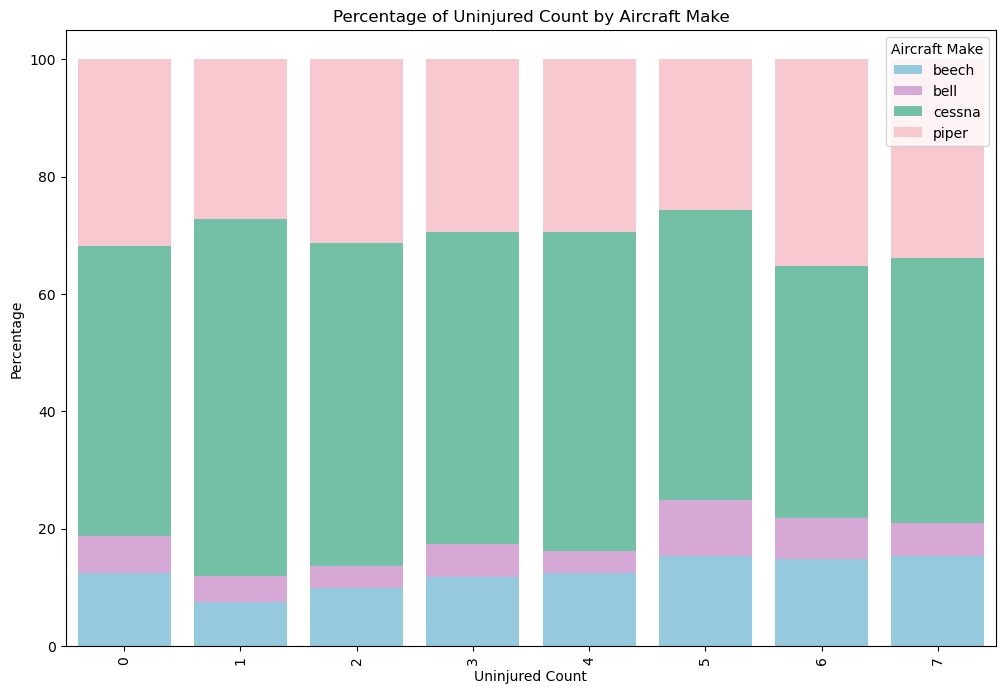

In [61]:
# Filter further to Top 4 Make 

# Use previous top25_make_data created
top4_make_names = top25_make_data['Make'].value_counts().nlargest(4).index

# Filter the DataFrame to include only the top 10 'Make' values
top4_make_data = top25_make_data[top25_make_data['Make'].isin(top4_make_names)]

# Calculate percentage values for each category per 'Make'
percentage_uninjured = top4_make_data.groupby(['Total.Uninjured', 'Make']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Stacks the DataFrame to create a Percentage column and restablishes 'Aircraft.damage'
# column to be used as 'hue'
stacked_percentage_uninjured = percentage_uninjured.stack().reset_index(name='Percentage')

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Total.Uninjured', y='beech', data=percentage_uninjured.reset_index(), color='skyblue', label='beech')
sns.barplot(x='Total.Uninjured', y='bell', data=percentage_uninjured.reset_index(), color='plum', label='bell', 
            bottom=percentage_uninjured['beech'])
sns.barplot(x='Total.Uninjured', y='cessna', data=percentage_uninjured.reset_index(), color='mediumaquamarine', label='cessna', 
            bottom=percentage_uninjured['beech'] + percentage_uninjured['bell'])
sns.barplot(x='Total.Uninjured', y='piper', data=percentage_uninjured.reset_index(), color='pink', label='piper', 
            bottom=percentage_uninjured['beech'] + percentage_uninjured['bell'] + percentage_uninjured['cessna'])

# Add labels and title
plt.xlabel('Uninjured Count')
plt.ylabel('Percentage')
plt.title('Percentage of Uninjured Count by Aircraft Make')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Make')

# Show the plot
plt.show();

<br> 

<br> When comparing `Make` with `Aircraft.damage` we can see that because Cessna is still by far the most popular, it also records the most substantial damage to the air craft. However, it does not *seem* have significanly more cases of destroyed aircrafts than lesser popular makes.

Again, we see that beyond the top 4 makes, the analysis becomes insignificant.

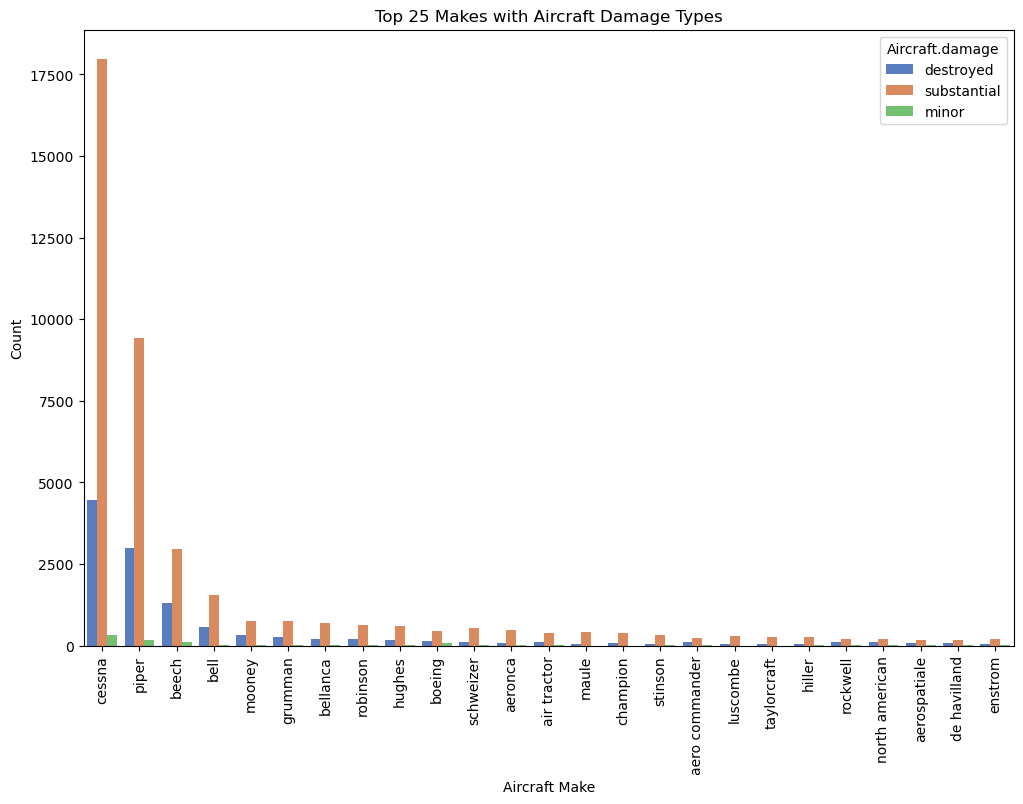

In [64]:
# Visualize top 25 'Make' with 'Aircraft.damage'

# Use previously established DataFrame
top25_make_data

# Get the order of 'Make' based on count in descending order
make_order = top25_make_data['Make'].value_counts().index

# Create a grouped bar chart comparing 'Make' and 'Aircraft.damage'
plt.figure(figsize=(12, 8))
sns.countplot(x='Make', hue='Aircraft.damage', data=top25_make_data, palette='muted', order=make_order)

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Top 25 Makes with Aircraft Damage Types')
plt.xticks(rotation=90)

# Show the plot
plt.show()

<br> Finally we want to compare `Make` and `Aircraft.damage` on a percentage scale to be certain which make poses least risk to the aircraft during an accident.

We can see that though it looked like Piper might have a lesser percentage of destroyed aircrafts, in fact, it is Cessna that poses least risk.

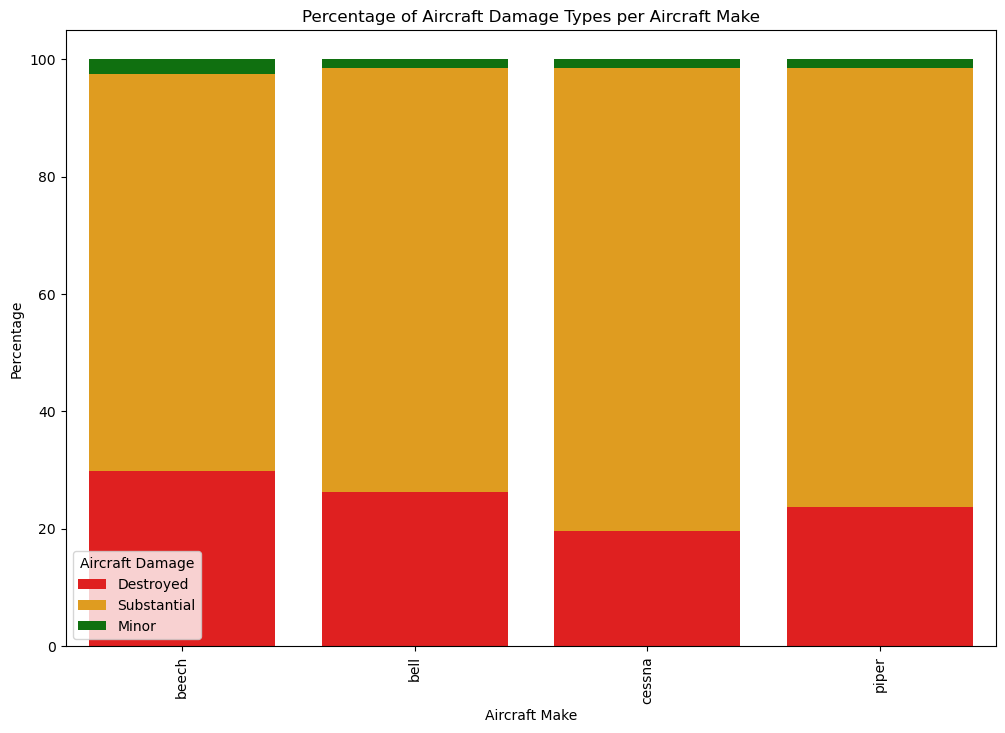

In [69]:
# We can use previously established DataFrame
top4_make_data

# Calculate percentage values for each category per 'Make'
percentage_damage = top4_make_data.groupby(['Make', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Stacks the DataFrame to create a Percentage column and restablishes 'Aircraft.damage'
# column to be used as 'hue'
stacked_percentage_damage = percentage_damage.stack().reset_index(name='Percentage')

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Make', y='destroyed', data=percentage_damage.reset_index(), color='red', label='Destroyed')
sns.barplot(x='Make', y='substantial', data=percentage_damage.reset_index(), color='orange', label='Substantial', bottom=percentage_damage['destroyed'])
sns.barplot(x='Make', y='minor', data=percentage_damage.reset_index(), color='green', label='Minor', bottom=percentage_damage['destroyed'] + percentage_damage['substantial'])

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Percentage')
plt.title('Percentage of Aircraft Damage Types per Aircraft Make')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage')

# Show the plot
plt.show();

<br> If we look at the data numerically, we can see that ~20% of Cessna accidents 

In [70]:
# Table of percentages
top4_make_data.groupby(['Make', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

Aircraft.damage,destroyed,minor,substantial
Make,,,
beech,29.901399,2.568218,67.530383
bell,26.222636,1.397299,72.380065
cessna,19.616889,1.405914,78.977198
piper,23.731640,1.405320,74.863041


## 4. Conclusion & Recommendations

